In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from utils import ReadData, ExtractX, ExtractX2, SetX, find_min_dist
e_pts_orig = np.load('./epts_orig.npy')

n: 1, phs: 0, fname: ./joint_train_single/anomaly_11/phantom_11_N128_refine7_n1_phs0.mat


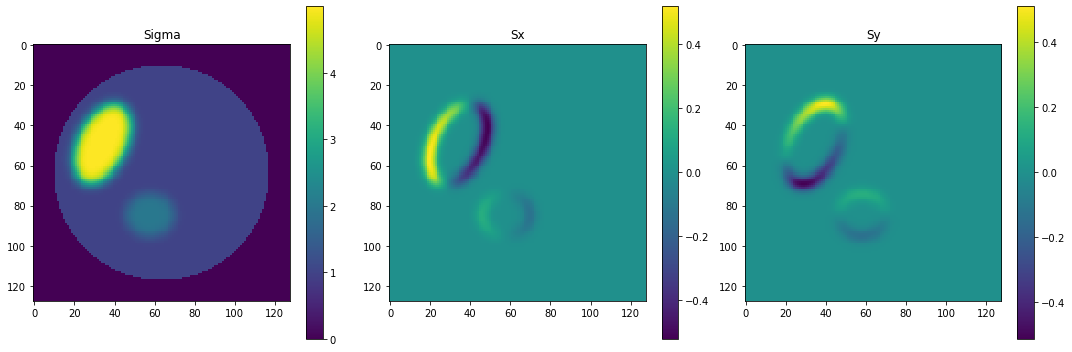

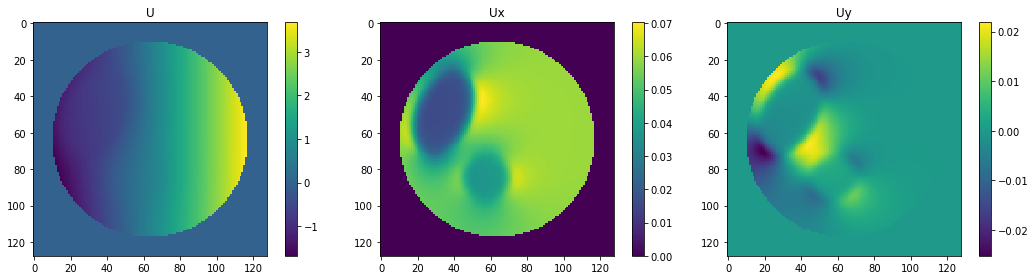

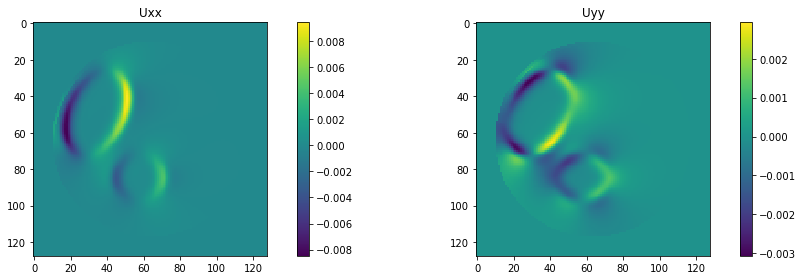

(8968, 2) (832, 2) (8136, 2) (816, 2) (16, 2)
n: 1, phs: 2, fname: ./joint_train_single/anomaly_11/phantom_11_N128_refine7_n1_phs2.mat


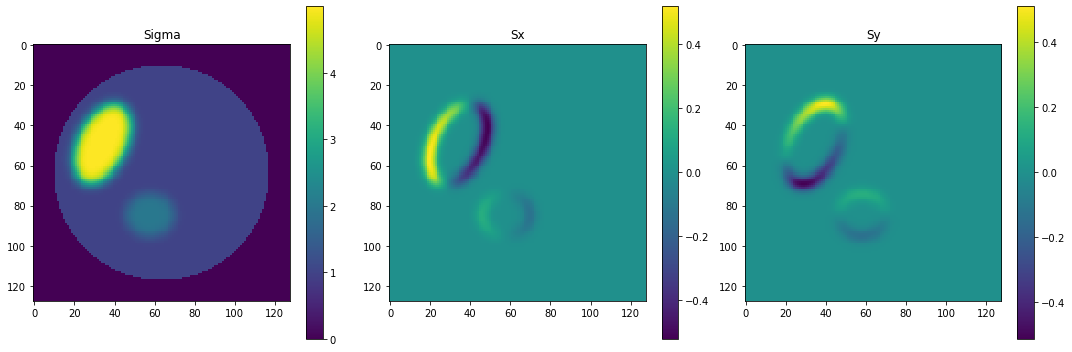

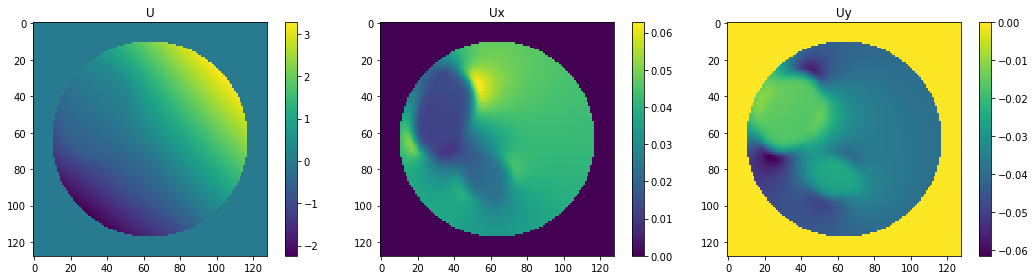

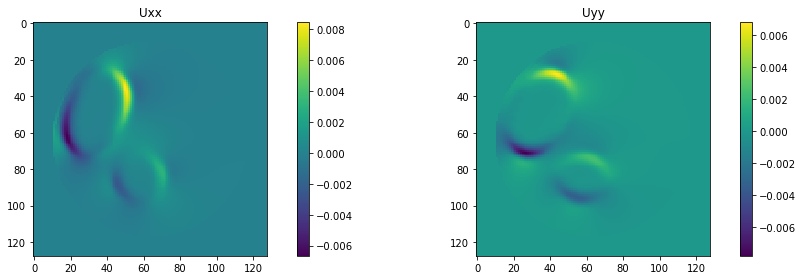

(8968, 2) (832, 2) (8136, 2) (816, 2) (16, 2)
n: 1, phs: 4, fname: ./joint_train_single/anomaly_11/phantom_11_N128_refine7_n1_phs4.mat


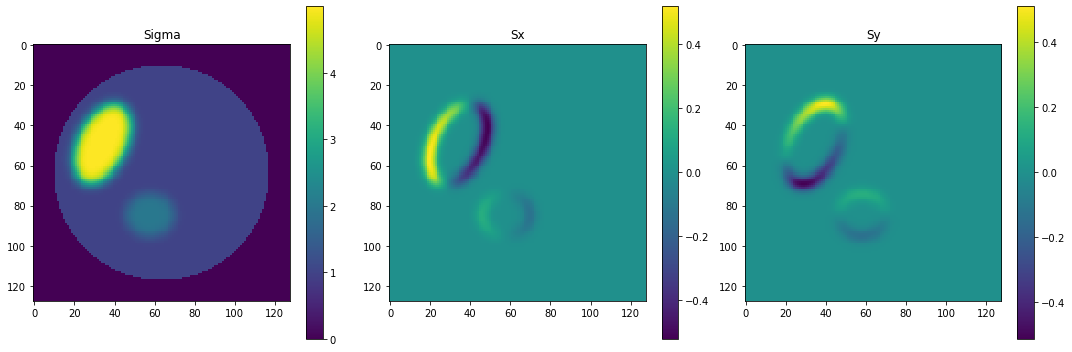

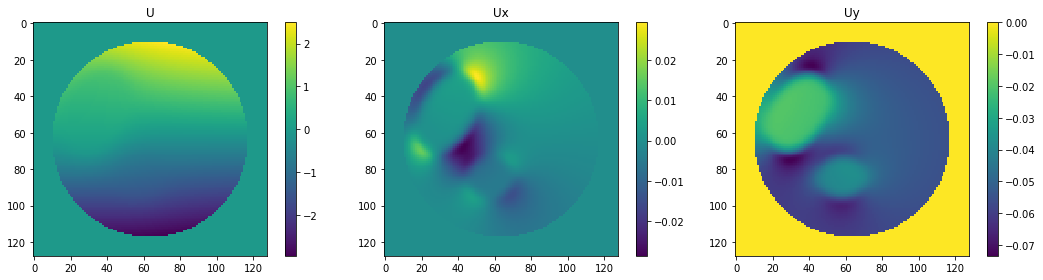

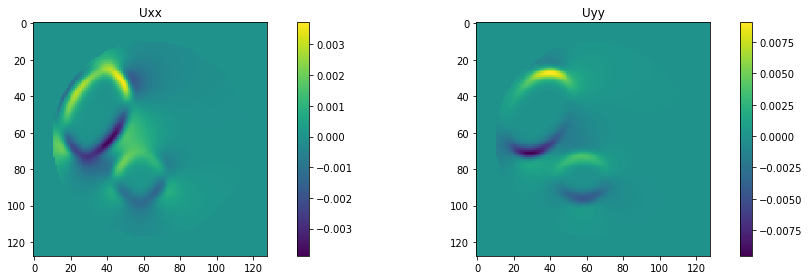

(8968, 2) (832, 2) (8136, 2) (816, 2) (16, 2)
n: 1, phs: 6, fname: ./joint_train_single/anomaly_11/phantom_11_N128_refine7_n1_phs6.mat


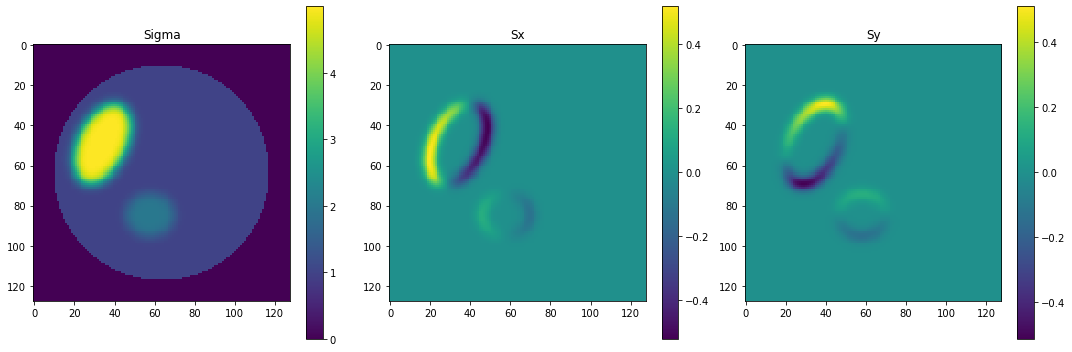

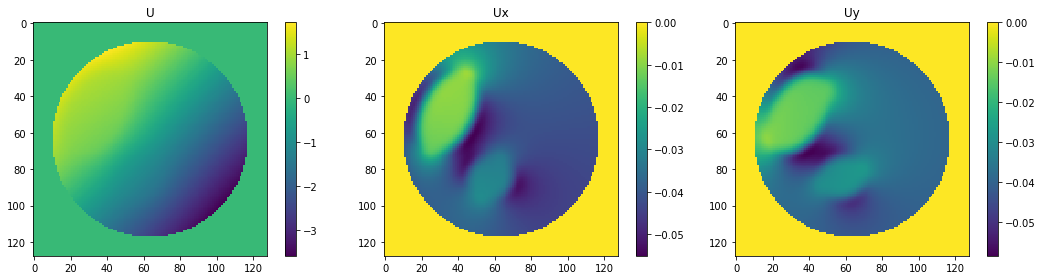

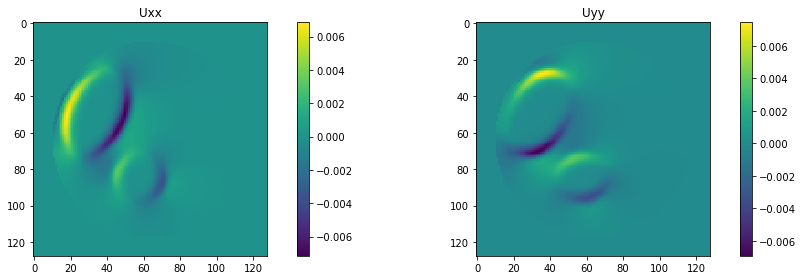

(8968, 2) (832, 2) (8136, 2) (816, 2) (16, 2)
n: 2, phs: 0, fname: ./joint_train_single/anomaly_11/phantom_11_N128_refine7_n2_phs0.mat


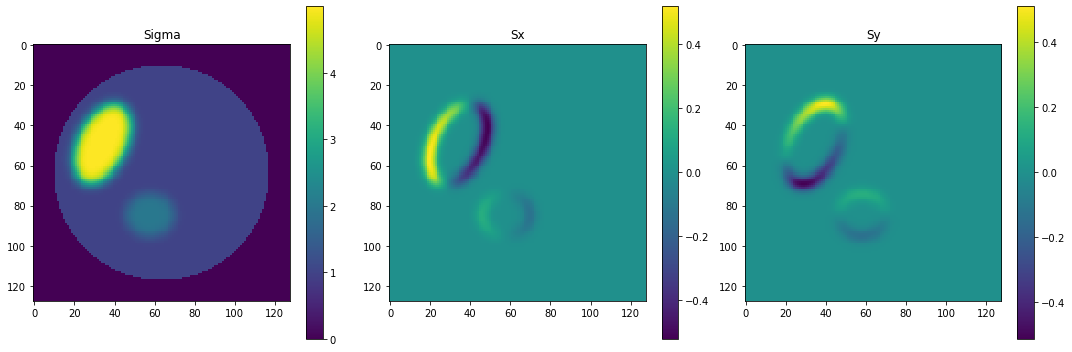

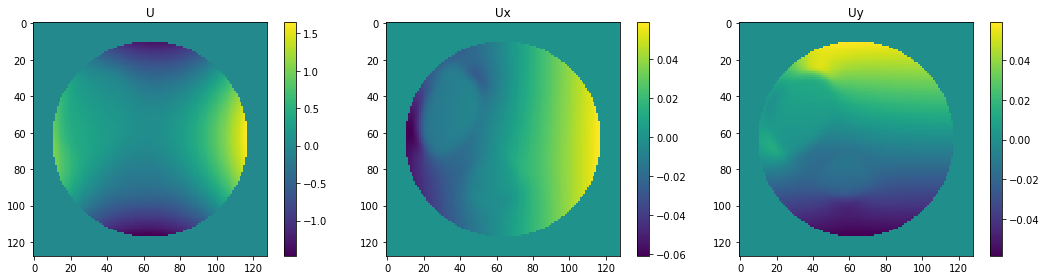

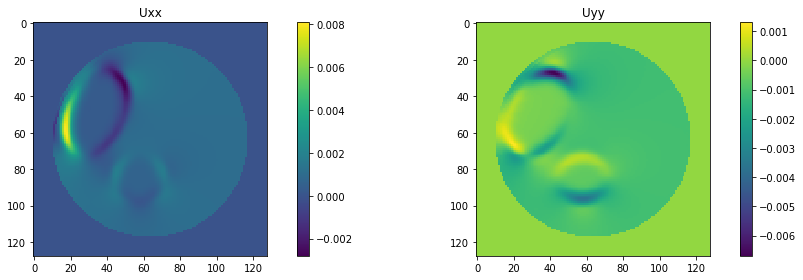

(8968, 2) (832, 2) (8136, 2) (816, 2) (16, 2)
n: 2, phs: 2, fname: ./joint_train_single/anomaly_11/phantom_11_N128_refine7_n2_phs2.mat


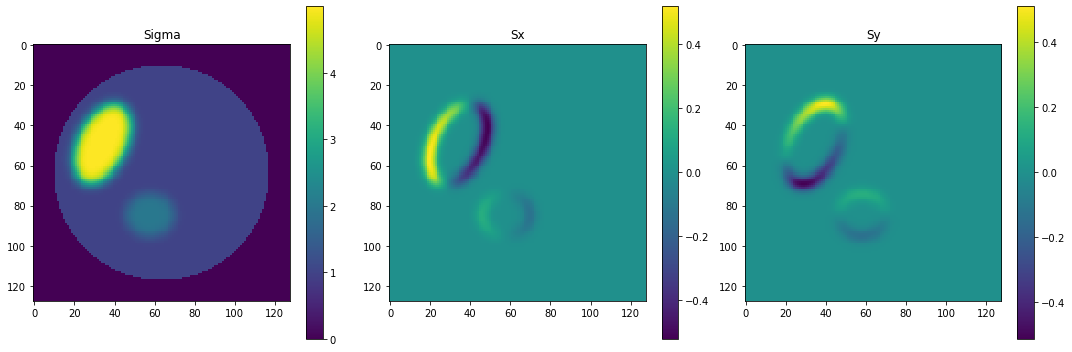

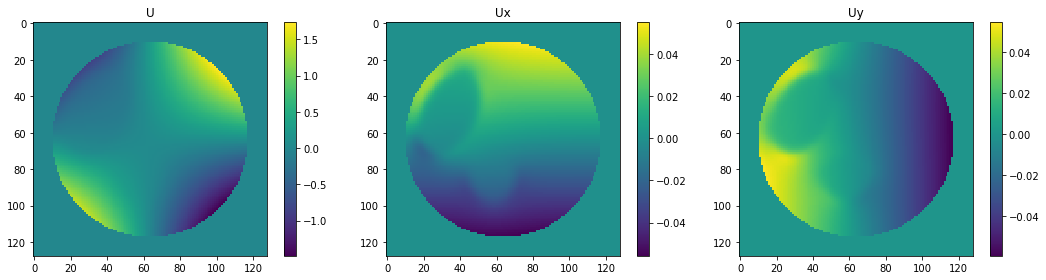

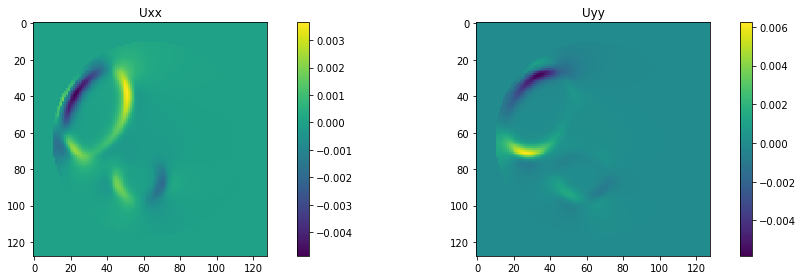

(8968, 2) (832, 2) (8136, 2) (816, 2) (16, 2)
n: 2, phs: 4, fname: ./joint_train_single/anomaly_11/phantom_11_N128_refine7_n2_phs4.mat


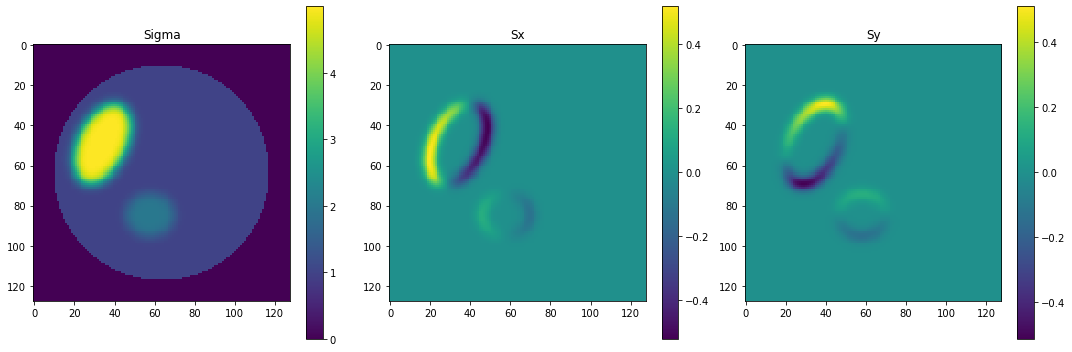

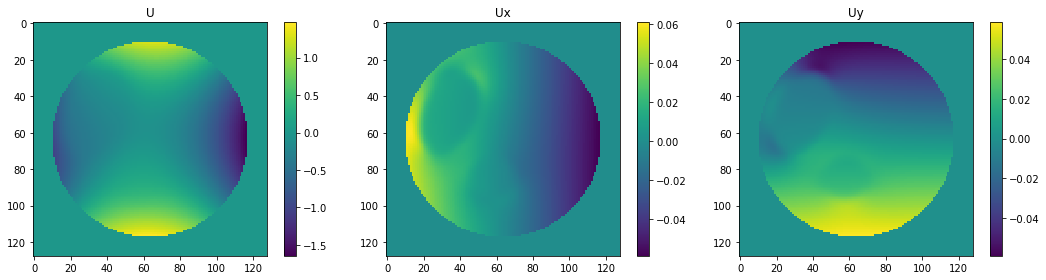

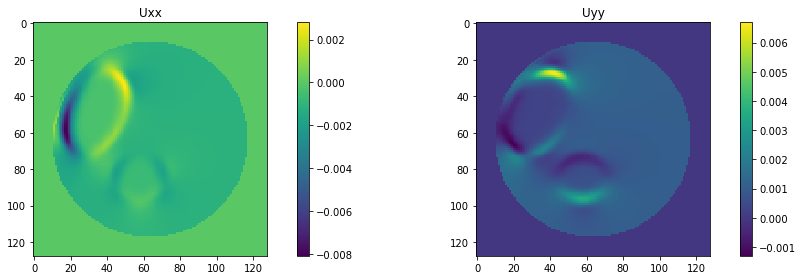

(8968, 2) (832, 2) (8136, 2) (816, 2) (16, 2)
n: 2, phs: 6, fname: ./joint_train_single/anomaly_11/phantom_11_N128_refine7_n2_phs6.mat


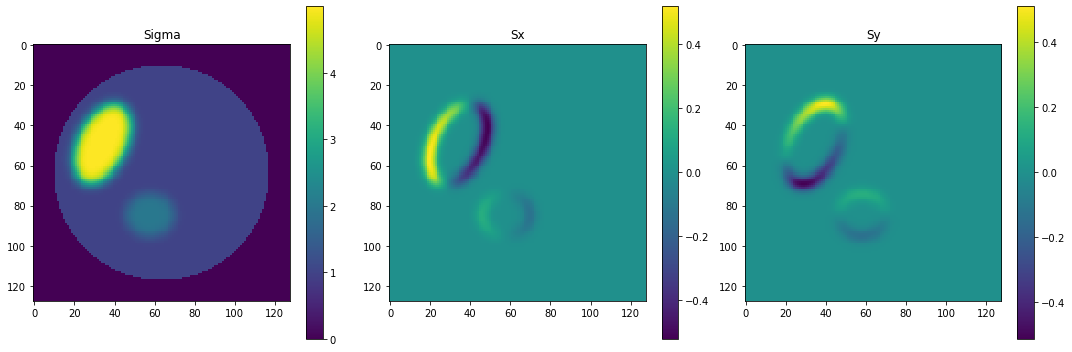

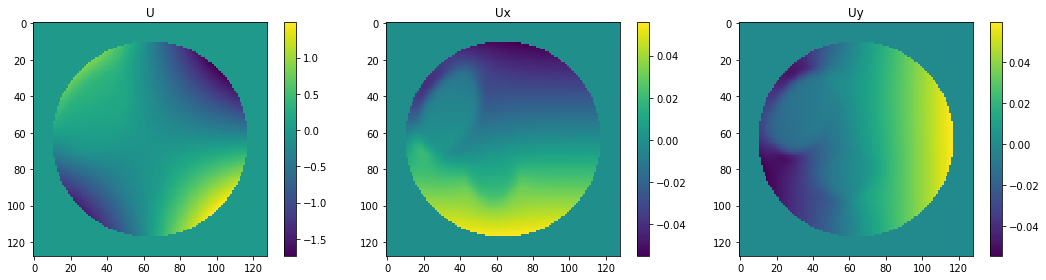

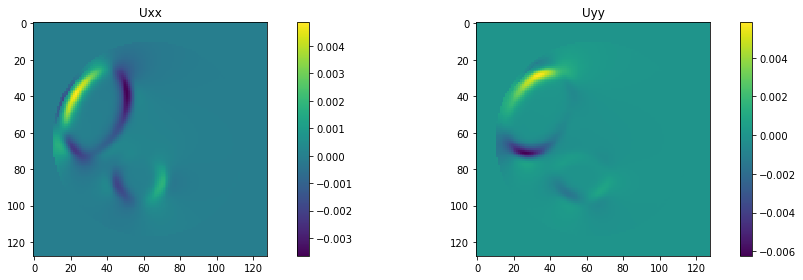

(8968, 2) (832, 2) (8136, 2) (816, 2) (16, 2)


In [2]:
anomaly = 11
nlist = [1, 2]
phslist = [0, 2, 4, 6]
plot_data = True
mesh_size = 128

combo_data = []
for n in nlist:
    for phs in phslist:
        InputFile = './joint_train_single/anomaly_' + str(anomaly) + '/phantom_' + str(anomaly) + '_N' + str(mesh_size) + '_refine7_n' + str(n) + '_phs' + str(phs) + '.mat'
        print('n: {}, phs: {}, fname: {}'.format(n, phs, InputFile))
        
        Dict = ReadData(InputFile)
        
        # all pts
        Xall, XallRand = ExtractX(Dict)
        CorrectS = Dict['CorrectS']
        CorrectB = Dict['CorrectB']
        Xallnor = SetX(Xall, CorrectB, CorrectS)
        Xallrandnor = SetX(XallRand, CorrectB, CorrectS)
        
        # all 128x128 pts
        XYall = ExtractX2(Dict)
        XYallnor = SetX(XYall, CorrectB, CorrectS)
        
        # domain pts
        Xdall = np.zeros((Dict['Xd'].shape[0], 2), dtype=np.int64)
        Xdall[:, 0] = np.transpose(Dict['Xd'])
        Xdall[:, 1] = np.transpose(Dict['Yd'])
        Xdallnor = SetX(Xdall, CorrectB, CorrectS)
        
        # boundary pts
        Xball = np.zeros((Dict['Xb'].shape[0], 2), dtype=np.int64)
        Xball[:, 0] = np.transpose(Dict['Xb'])
        Xball[:, 1] = np.transpose(Dict['Yb'])
        Xballnor = SetX(Xball, CorrectB, CorrectS)
        
        # electrode pts
        id_e = find_min_dist(Xballnor, e_pts_orig)
        Xenor = Xballnor[id_e]
        Xbnor = np.delete(Xballnor, id_e, axis=0)
        
        uxe = Dict['uxb'][id_e]
        uye = Dict['uyb'][id_e]
        ge = Dict['gb'][id_e]
        ue = Dict['ub'][id_e]
        se = Dict['sb'][id_e]
        
        gb = np.delete(Dict['gb'], id_e, axis=0)
        
        ub = np.delete(Dict['ub'], id_e, axis=0)
        uxb = np.delete(Dict['uxb'], id_e, axis=0)
        uyb = np.delete(Dict['uyb'], id_e, axis=0)
        uxxb = np.delete(Dict['uxxb'], id_e, axis=0)
        uyyb = np.delete(Dict['uyyb'], id_e, axis=0)
        
        sb = np.delete(Dict['sb'], id_e, axis=0)
        sxb = np.delete(Dict['sxb'], id_e, axis=0)
        syb = np.delete(Dict['syb'], id_e, axis=0)
        
        nhatxb = np.delete(Dict['n_hat_xb'], id_e, axis=0)
        nhatyb = np.delete(Dict['n_hat_yb'], id_e, axis=0)
        
        nhatxe = Dict['n_hat_xb'][id_e]
        nhatye = Dict['n_hat_yb'][id_e]
        
        all_dict = dict({'n': n, 'phs': phs,
                         'XYall': XYall, 'XYallnor': XYallnor,
                         'Xall': Xall, 'Xallnor': Xallnor, 
                         'XallRand': XallRand, 'Xallrandnor': Xallrandnor, 
                         'Xball': Xball, 'Xballnor': Xballnor, 'xyb': Xbnor,
                         'Xdall': Xdall, 'xyd': Xdallnor, 
                         'xye': Xenor,
                         'center': Dict['center'],
                         'radius': Dict['radius'],
                         'Omega': Dict['Omega'], 'W': Dict['W'], 'h': Dict['h'], 'CorrectS': CorrectS, 'CorrectB': CorrectB,
                          
                         'nhatxb': nhatxb, 'nhatyb': nhatyb, 'nhatxe': nhatxe, 'nhatye': nhatye, 
                        
                         'Sigma': Dict['Sigma'], 'sx': Dict['sx'], 'sy': Dict['sy'], 
                         'sd': Dict['sd'], 'sxd': Dict['sxd'], 'syd': Dict['syd'],
                         'sb': sb, 'sxb': sxb, 'syb': syb, 'se': se,
                            
                         'U': Dict['U'], 'ux': Dict['ux'], 'uy': Dict['uy'], 'uxx': Dict['uxx'], 'uyy': Dict['uyy'], 
                         'ud': Dict['ud'], 'uxd': Dict['uxd'], 'uyd': Dict['uyd'], 'uxxd': Dict['uxxd'], 'uyyd': Dict['uyyd'],
                         'uxb': uxb, 'uyb': uyb, 'ub': ub, 'uxxb': uxxb, 'uyyb': uyyb,
                         'uxe': uxe, 'uye': uye, 'fe': ge, 'fb': gb, 'ue': ue, 'G': Dict['G']}
                       )
        
        if plot_data:
            plt.figure(figsize=(15,5))
            plt.subplot(131)
            plt.colorbar(plt.imshow(all_dict['Sigma']*all_dict['Omega']));        plt.title('Sigma'); plt.tight_layout();
            plt.subplot(132)
            plt.colorbar(plt.imshow(all_dict['sx']*all_dict['Omega']));        plt.title('Sx'); plt.tight_layout();
            plt.subplot(133)
            plt.colorbar(plt.imshow(all_dict['sy']*all_dict['Omega']));        plt.title('Sy'); plt.tight_layout();
            plt.show()

            plt.figure(figsize=(15,4))
            plt.subplot(131)
            plt.colorbar(plt.imshow(all_dict['U']*all_dict['Omega']));        plt.title('U'); plt.tight_layout();
            plt.subplot(132)
            plt.colorbar(plt.imshow(all_dict['ux']*all_dict['Omega']));        plt.title('Ux'); plt.tight_layout();
            plt.subplot(133)
            plt.colorbar(plt.imshow(all_dict['uy']*all_dict['Omega']));        plt.title('Uy'); plt.tight_layout();
            plt.show()

            plt.figure(figsize=(15,4))
            plt.subplot(121)
            plt.colorbar(plt.imshow(all_dict['uxx']*all_dict['Omega']));        plt.title('Uxx'); plt.tight_layout();
            plt.subplot(122)
            plt.colorbar(plt.imshow(all_dict['uyy']*all_dict['Omega']));        plt.title('Uyy'); plt.tight_layout();
            plt.show()
        
        combo_data.append(all_dict)
        
        print(Xallnor.shape, Xballnor.shape, Xdallnor.shape, Xbnor.shape, Xenor.shape)

In [3]:
# data integrity check
for i in range(len(combo_data)-1):
    print()
    for keys in combo_data[1].keys():
        print(keys, np.array_equal(combo_data[i][keys], combo_data[i+1][keys]))


n True
phs False
XYall True
XYallnor True
Xall True
Xallnor True
XallRand False
Xallrandnor False
Xball True
Xballnor True
xyb True
Xdall True
xyd True
xye True
center True
radius True
Omega True
W True
h True
CorrectS True
CorrectB True
nhatxb True
nhatyb True
nhatxe True
nhatye True
Sigma True
sx True
sy True
sd True
sxd True
syd True
sb True
sxb True
syb True
se True
U False
ux False
uy False
uxx False
uyy False
ud False
uxd False
uyd False
uxxd False
uyyd False
uxb False
uyb False
ub False
uxxb False
uyyb False
uxe False
uye False
fe False
fb False
ue False
G False

n True
phs False
XYall True
XYallnor True
Xall True
Xallnor True
XallRand False
Xallrandnor False
Xball True
Xballnor True
xyb True
Xdall True
xyd True
xye True
center True
radius True
Omega True
W True
h True
CorrectS True
CorrectB True
nhatxb True
nhatyb True
nhatxe True
nhatye True
Sigma True
sx True
sy True
sd True
sxd True
syd True
sb True
sxb True
syb True
se True
U False
ux False
uy False
uxx False
uyy False
ud 

In [4]:
# remove redundant data
dictlist = ['XYall', 'XYallnor', 'Xall', 'Xallnor', 'Xball', 'Xballnor', 'Xdall',
            'Omega', 'W', 'xyd', 'xyb', 'xye', 'Sigma', 'sx', 'sy', 'sd', 'sxd', 'syd', 'sb', 'sxb', 'syb', 'se', 'h',
           'CorrectS', 'CorrectB', 'nhatxb', 'nhatyb', 'nhatxe', 'nhatye'] # to keep

for i in range(len(combo_data)):
    if i > 0:
        for d in dictlist:
            del combo_data[i][d]

In [5]:
len(combo_data)

8

In [6]:
np.save('./multi_phantom_' + str(anomaly) + '_' + str(mesh_size) + '.npy', combo_data)
print('saved')